# Bonus: Temperature Analysis I

In [92]:
import pandas as pd
from datetime import datetime as dt
import numpy as np

In [93]:
# "tobs" is "temperature observations"
measurements = pd.read_csv('Resources/hawaii_measurements.csv')
measurements.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [94]:
# Convert the date column format from string to datetime
measurements['date']= pd.to_datetime(measurements['date'])
measurements.dtypes

station            object
date       datetime64[ns]
prcp              float64
tobs                int64
dtype: object

In [95]:
# Set the date column as the DataFrame index
measurements = measurements.set_index('date')
measurements

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


In [96]:
# Drop the date column

#there is only 1 date column and i believe this is the thought that 2 date columns would remain 
#but i'm adding the columns month and year to the df
measurements['month'] = pd.DatetimeIndex(measurements.index).month
measurements['year'] = pd.DatetimeIndex(measurements.index).year
measurements

,station,prcp,tobs,month,year
date,,,,,
2010-01-01,USC00519397,0.08,65,1,2010
2010-01-02,USC00519397,0.00,63,1,2010
2010-01-03,USC00519397,0.00,74,1,2010
2010-01-04,USC00519397,0.00,76,1,2010
2010-01-06,USC00519397,NaN,73,1,2010
...,...,...,...,...,...
2017-08-19,USC00516128,0.09,71,8,2017
2017-08-20,USC00516128,NaN,78,8,2017
2017-08-21,USC00516128,0.56,76,8,2017


### Compare June and December data across all years 

In [97]:
from scipy import stats
from scipy.stats import ttest_ind

In [98]:
# Filter data for desired months june and december
june_decemeber = measurements.loc[(measurements['month'] == 6) |
                                 (measurements['month'] == 12)]
june_decemeber

,station,prcp,tobs,month,year
date,,,,,
2010-06-01,USC00519397,0.00,78,6,2010
2010-06-02,USC00519397,0.01,76,6,2010
2010-06-03,USC00519397,0.00,78,6,2010
2010-06-04,USC00519397,0.00,76,6,2010
2010-06-05,USC00519397,0.00,77,6,2010
...,...,...,...,...,...
2017-06-26,USC00516128,0.02,79,6,2017
2017-06-27,USC00516128,0.10,74,6,2017
2017-06-28,USC00516128,0.02,74,6,2017


In [115]:
# Identify the average temperature for June
june = june_decemeber.loc[(june_decemeber['month'] == 6)]
june['tobs'].mean()

74.94411764705882

In [116]:
# Identify the average temperature for December
december = june_decemeber.loc[(june_decemeber['month'] == 12)]
december['tobs'].mean()

71.04152933421226

In [145]:
# Create collections of temperature data
june_decemeber['tobs'].describe(include='all')

count    3217.000000
mean       73.103823
std         4.002072
min        56.000000
25%        71.000000
50%        73.000000
75%        76.000000
max        85.000000
Name: tobs, dtype: float64

In [120]:
june['tobs'].describe()

count    1700.000000
mean       74.944118
std         3.257417
min        64.000000
25%        73.000000
50%        75.000000
75%        77.000000
max        85.000000
Name: tobs, dtype: float64

In [121]:
december['tobs'].describe()

count    1517.000000
mean       71.041529
std         3.745920
min        56.000000
25%        69.000000
50%        71.000000
75%        74.000000
max        83.000000
Name: tobs, dtype: float64

In [132]:
# Run paired t-test

ttest_ind(june['tobs'], december['tobs'])


Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

In [133]:
print(np.var(june['tobs']), (np.var(december['tobs'])))

10.604524221453236 14.022665558302293


In [136]:
import pingouin as pg

In [137]:
res = pg.ttest(june['tobs'], december['tobs'], correction = False)
display(res)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,31.603724,3215,two-sided,3.902513e-191,"[3.66, 4.14]",1.116212,9.68e+186,1.0


In [140]:
import seaborn as sns

<AxesSubplot:xlabel='month', ylabel='tobs'>

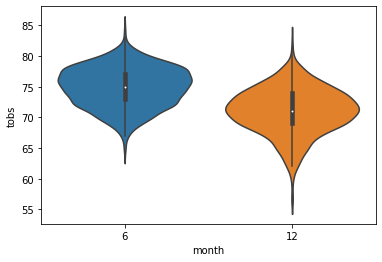

In [142]:
sns.violinplot(x='month', y='tobs', data=june_decemeber)

### Analysis

Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
Will you use a paired t-test, or an unpaired t-test? Why?

I used the t-test to determine that there is a 3.9 temperature degreee difference in the means. 
This is an unpaired t-test to determine if there are any differences between the temperatures between the months. 
It shows very small temperature differences you can see in the plot above that June has a longer timeframe for warmer weather.